In [13]:
# question 8, importing .txt file 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
class1 = pd.read_csv("C:/Users/ABHILASH/Downloads/class1.txt")
class2 = pd.read_csv("C:/Users/ABHILASH/Downloads/class2.txt")
print(class1.shape)
print(class2.shape)

(100, 2)
(100, 2)


In [2]:
posLabel=1          # positive class Label
negLabel=-1         # negative class label
T=(posLabel+negLabel)/2 

class1.insert(class1.shape[1],'label',posLabel)
class2.insert(class2.shape[1],'label',negLabel)
# combine both datasets as one
class12 = class1.append(class2)
print(class12.shape)
class12.head()
print(class12)

(200, 3)
    weight  height  label
0    0.132   0.757      1
1    0.722   0.888      1
2    0.095   0.804      1
3    0.633   0.530      1
4    0.472   0.701      1
..     ...     ...    ...
95   0.052   0.385     -1
96   0.433   0.986     -1
97   0.357   0.554     -1
98   0.303   0.889     -1
99   0.061   0.814     -1

[200 rows x 3 columns]


C:\Users\ABHILASH\AppData\Local\Temp\ipykernel_5524\2684444537.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class12 = class1.append(class2)


In [3]:
#  # 20% test samples  and 80% training samples are used, test_size = 0.2 indicates 20% test samples
class12_rand=shuffle(class12)
features,labels=class12_rand.iloc[:,0:-1],class12_rand.loc[:,['label']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# convert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(X_train, dtype = 'float64')
X_test_m=np.asmatrix(X_test, dtype = 'float64')
y_train_m=np.asmatrix(y_train, dtype = 'float64')
y_test_m=np.asmatrix(y_test, dtype = 'float64')

In [4]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_= []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)

            v = np.dot(w, x.transpose())
            
            diff = learning_rate*(labels[i] - v)
            deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]        
        totalSquaredErr_.append(err)
        
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if(((v-T)>=0 and test_labels[i]==negLabel) or ((v-T)<0 and test_labels[i]==posLabel)):
                this_err=this_err+1
        this_err=float(this_err) 
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)        
        #next epoch
        epoch=epoch+1
    return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)

In [14]:
max_iter = 2000
eta=1 
#eta=0.01
print("Learning rate is: %.5f" % eta)
err_threshold=0.01
w, misclassified, testError, accuracy= GradientDescentLearning(X_train_m, y_train_m, max_iter, eta, err_threshold,X_test_m,y_test_m)
print(misclassified[0:200])
print(testError[0:200])
print(accuracy[0:200])

Learning rate is: 1.00000
[14073.964998673535, 856786798.780822, 52309875908099.46, 3.1937282715264563e+18, 1.9498995756677968e+23, 1.190492124611402e+28, 7.268433289835442e+32, 4.43767089228186e+37, 2.7093765826736423e+42, 1.6541833869446066e+47, 1.0099454963707162e+52, 6.166123500511556e+56, 3.7646664260785643e+61, 2.298480284812226e+66, 1.4033146690166376e+71, 8.56780053015837e+75, 5.230986858850528e+80, 3.1937278909737986e+85, 1.9498993434338912e+90, 1.1904919828234394e+95, 7.268432424162897e+99, 4.437670363753949e+104, 2.709376259986093e+109, 1.6541831899308764e+114, 1.0099453760859102e+119, 6.166122766124436e+123, 3.764665977705685e+128, 2.298480011062546e+133, 1.4033145018814452e+138, 8.567799509730793e+142, 5.230986235838438e+147, 3.1937275105998605e+152, 1.949899111200301e+157, 1.1904918410354922e+162, 7.268431558490445e+166, 4.437669835226098e+171, 2.709375937298578e+176, 1.65418299291717e+181, 1.009945255801118e+186, 6.166122031737391e+190, 3.7646655293328543e+195, 2.2984797

C:\Users\ABHILASH\AppData\Local\Temp\ipykernel_5524\980900035.py:20: RuntimeWarning: overflow encountered in add
  deltaw=deltaw+diff*x
C:\Users\ABHILASH\AppData\Local\Temp\ipykernel_5524\980900035.py:24: RuntimeWarning: invalid value encountered in add
  w=w+deltaw


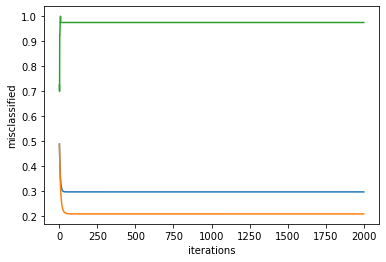

In [6]:
#  the two error rates on the same chart, where the x-axis denotes the iteration and the y-axis denotes the mean classification errors
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.plot(epochs, accuracy)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

[[-0.11470062 -1.54770241  1.50864708]]
1.025887646729166 0.07602879319349141


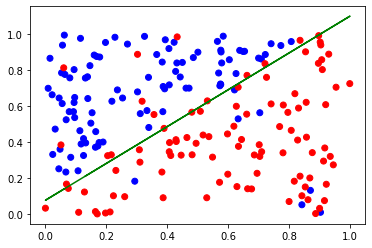

In [9]:
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=(T-w[0,0])/w[0,2]
print(slope,intercept)
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept

#  the final decision surface on the same scatter plot which shows the 200 instances
colors=["red","black","blue","green"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")

In [10]:
#   now we implement Delta rule leanring. Which use a signle instance to update the network weight value with learning rate = 0.01
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_ = []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        # random select an instance
        i=random.randrange(features.shape[0])
        x=features[i,]
        x = np.insert(x,0,1)

        v = np.dot(w, x.transpose())
            
        diff = learning_rate*(labels[i] - v)
        deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        # now calculate error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        epoch=epoch+1
    return (w, totalSquaredErr_)

In [11]:
# maximum 2000 iterations. Because delta rule only uses one instance to update, 
# learning rate = 0.01
max_iter = 2000
eta=0.01
err_threshold=0.01
w, misclassified= Delta(X_train_m, y_train_m, max_iter, eta, err_threshold)
print(misclassified[0:200])

C:\Users\ABHILASH\AppData\Local\Temp\ipykernel_5524\1344197603.py:34: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  this_err=np.asscalar(this_err)


[80.249501874495, 80.27776255747771, 80.14737972424093, 79.96463733038924, 79.74432154980158, 79.69480098184607, 79.71926115372314, 79.79367886019772, 79.59632761992894, 79.75822293323255, 79.59604676141205, 79.67723832241671, 79.44267707541455, 79.31234491185212, 79.34981358490909, 79.15636395119802, 79.21974566580654, 79.23989621946382, 79.18741584878622, 79.25626575622209, 79.06942494350167, 79.16161408214239, 79.15214630215965, 79.40189819709967, 79.22797712167645, 79.08555351413511, 78.96043291574856, 78.8783727768331, 78.8092530814868, 78.68053107665851, 78.590430246485, 78.55134798686032, 78.51742766061147, 78.43800123252333, 78.51911789673446, 78.34160799693889, 78.26878046959656, 78.29652221251615, 78.17842792718007, 78.11578852786405, 78.05743927867847, 77.96521172964671, 77.91070634217512, 77.97357320900583, 77.97990321773835, 77.93666026687873, 77.80258364929787, 77.94012127888118, 77.7530599511597, 77.82810067698841, 77.54519331628289, 77.43527189608811, 77.33487741919677,

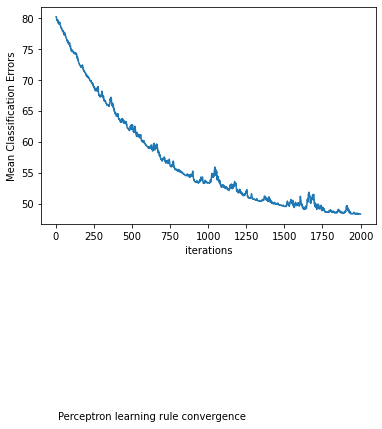

In [12]:
#report the training errors as a plot, where the x-axis denotes the iteration, and the yaxis denotes the mean classification errors [epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('Mean Classification Errors')
plt.text(10,15,"Perceptron learning rule convergence")
plt.show()